In [1]:
//load ImageJ
%classpath config resolver imagej.public 'https://maven.imagej.net/content/groups/public'
%classpath add jar '/Users/curtis/code/imagej/imagej-notebook/target/imagej-notebook-0.3.0-TESTING.jar'
%classpath add mvn net.imagej imagej 2.0.0-rc-68

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@7aebc514

In [2]:
ij

net.imagej.ImageJ@7aebc514

In [3]:
org.scijava.util.VersionUtils.getVersion(ij.notebook().getClass())

0.3.0-TESTING

In [11]:
ij.context().getServiceIndex().forEach{ s ->
    if (s.toString().startsWith("net.imagej.notebook")) println(s)
}

net.imagej.notebook.DefaultNotebookService [priority = 0.0]


null

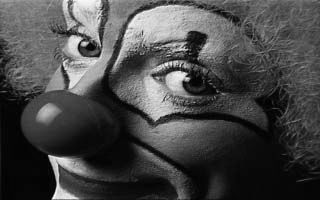

In [14]:
img = ij.scifio().datasetIO().open("/Users/curtis/data/clown8.tif")

In [16]:
ij.notebook().methods(ij.notebook())

1. Fix the Git history to stop sucking. File a PR against imagej-notebook.
2. Scrutinize the NotebookService API; maybe make it nicer. Do we really need six display methods?
3. Test out auto-display of all the supported types. E.g. if I make an ARGBType image as cell output, does it paint correctly?
4. Think about if any other ImageJ or SciJava types should be auto-displayed. E.g. org.scijava.table could be shown? Note that it _was_ net.imagej.table, but moved to scijava-table, but rc-68 used here doesn't have that change in place yet.

In [20]:
ij.notebook().methods(ij.get("net.imagej.table.TableService"))